In [82]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

# 붓꽃 데이터 로드 후, test_size = 20%

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, random_state = 0, test_size=0.2,
                                                   stratify = iris_dataset.target)

In [64]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [65]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

tree3 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# 모든 리프노드가 순수 노드일때 모델 시각화

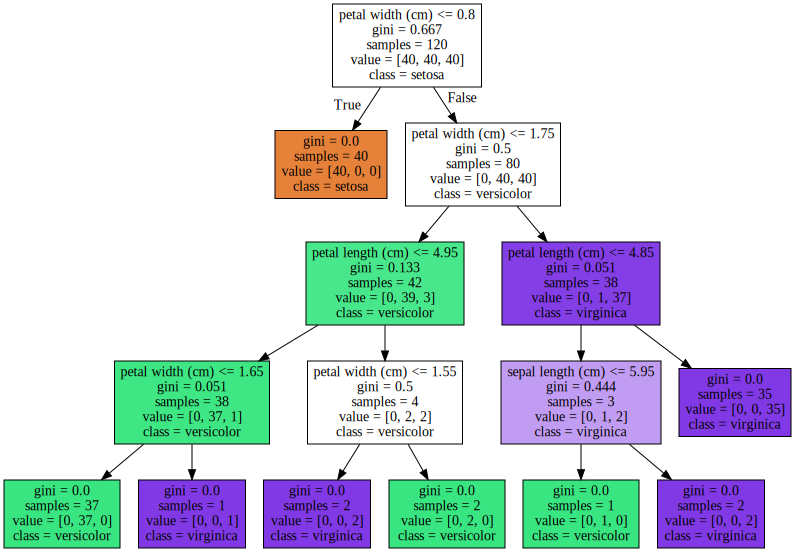

In [66]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot", class_names = ["setosa", "versicolor","virginica"],
               feature_names = iris_dataset.feature_names, impurity = True, filled = True)
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 모든 노드가 순수 노드일때의 특성중요도 

< 모든 노드가 순수 노드일때의 특성중요도 >
sepal length (cm)  :  0.01666666666666666
sepal width (cm)  :  0.0
petal length (cm)  :  0.027976190476190484
petal width (cm)  :  0.9553571428571429


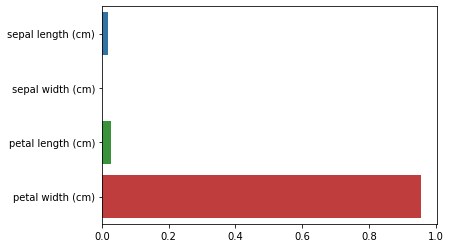

In [108]:
print('< 모든 노드가 순수 노드일때의 특성중요도 >')
import seaborn as sns
for i in range(len(iris_dataset.feature_names)):
    print(iris_dataset.feature_names[i], ' : ', tree.feature_importances_[i])
sns.barplot(x=tree.feature_importances_, y = iris_dataset.feature_names )


# 모든 노드가 순수 노드일때의 훈련, 테스트 세트 점수

In [68]:
print('훈련 세트 점수 :{:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 점수 :{:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 점수 :1.000
테스트 세트 점수 :0.967


# max_depth = 3인 모델 시각화

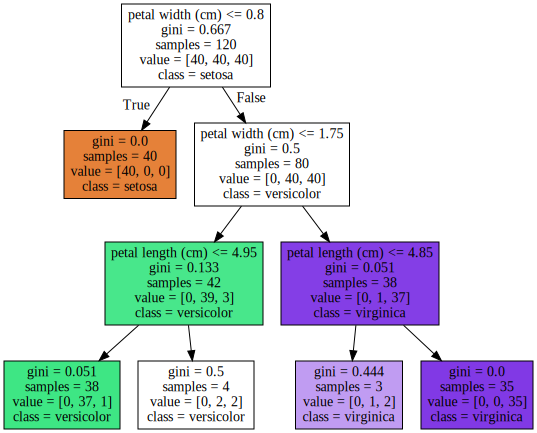

In [69]:
from sklearn.tree import export_graphviz
export_graphviz(tree3, out_file = "tree3.dot", class_names = ["setosa", "versicolor","virginica"],
               feature_names = iris_dataset.feature_names, impurity = True, filled = True)
import graphviz

with open("tree3.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# max_depth = 3 일때의 특성중요도 

< max_depth = 3 일때의 특성중요도 >
sepal length (cm)  :  0.0
sepal width (cm)  :  0.0
petal length (cm)  :  0.029953376044007655
petal width (cm)  :  0.9700466239559923


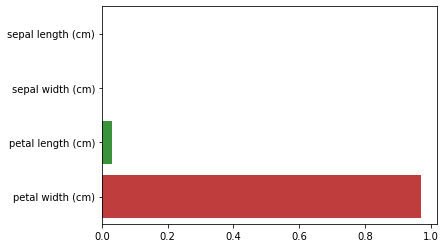

In [109]:
print('< max_depth = 3 일때의 특성중요도 >')
for i in range(len(iris_dataset.feature_names)):
    print(iris_dataset.feature_names[i], ' : ', tree3.feature_importances_[i])

sns.barplot(x=tree3.feature_importances_, y = iris_dataset.feature_names )

# max_depth = 3 일때의 훈련, 테스트 셋 점수


In [71]:
print('훈련 세트 점수 :{:.3f}'.format(tree3.score(X_train, y_train)))
print('테스트 세트 점수 :{:.3f}'.format(tree3.score(X_test, y_test)))

훈련 세트 점수 :0.967
테스트 세트 점수 :0.933


# 디시젼 트리 모델링에서 가장 중요하게 여겨지는 특성은 petal width 이다.